In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='latin1')
engagement = pd.read_csv('takehome_user_engagement.csv')

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


Change the format of creation_time and last_session_creation_time

In [5]:
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

In [6]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [343]:
engagement.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [344]:
users['object_id'].unique().shape

(12000,)

In [8]:
engagement.shape

(207917, 3)

In [345]:
engagement['user_id'].unique().shape

(8823,)

There are 12000 users and 207917 engagement entries but only 8823 are in the engagement list.

**Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption**

In [9]:
engagement.index = pd.to_datetime(engagement.time_stamp)
engagement = engagement.drop('time_stamp',1)
engagement.head(5)

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [10]:
sevenday_logins = engagement.groupby('user_id')['visited'].rolling('7D').count().reset_index().rename(columns={'visited':'count'})
sevenday_logins.head(10)

,user_id,time_stamp,count
0,1,2014-04-22 03:53:30,1.0
1,2,2013-11-15 03:45:04,1.0
2,2,2013-11-29 03:45:04,1.0
3,2,2013-12-09 03:45:04,1.0
4,2,2013-12-25 03:45:04,1.0
5,2,2013-12-31 03:45:04,2.0
6,2,2014-01-08 03:45:04,1.0
7,2,2014-02-03 03:45:04,1.0
8,2,2014-02-08 03:45:04,2.0
9,2,2014-02-09 03:45:04,3.0


Lets get the maximum 7-day logins for each user.

In [11]:
sevenday_logins=sevenday_logins.groupby('user_id').max()
sevenday_logins.head()

,time_stamp,count
user_id,,
1,2014-04-22 03:53:30,1.0
2,2014-03-31 03:45:04,3.0
3,2013-03-19 23:14:52,1.0
4,2013-05-22 08:09:28,1.0
5,2013-01-22 10:14:20,1.0


In [12]:
sevenday_logins['adopted'] = sevenday_logins['count'].map(lambda x:1 if x > 2 else 0)

In [13]:
sevenday_logins.shape

(8823, 3)

In [14]:
sevenday_logins.head(10)

,time_stamp,count,adopted
user_id,,,
1,2014-04-22 03:53:30,1.0,0
2,2014-03-31 03:45:04,3.0,1
3,2013-03-19 23:14:52,1.0,0
4,2013-05-22 08:09:28,1.0,0
5,2013-01-22 10:14:20,1.0,0
6,2013-12-19 03:37:06,1.0,0
7,2012-12-20 13:24:32,1.0,0
10,2014-06-03 22:08:03,7.0,1
11,2013-12-27 03:55:54,1.0,0


In [15]:
sevenday_logins.tail(5)

,time_stamp,count,adopted
user_id,,,
11996,2013-09-06 06:14:15,1.0,0
11997,2013-01-15 18:28:37,1.0,0
11998,2014-04-27 12:45:16,1.0,0
11999,2012-06-02 11:55:59,1.0,0
12000,2014-01-26 08:57:12,1.0,0


Adopted user is one who logged in 3 separate days at least in one 7-day period.

In [16]:
sevenday_logins=sevenday_logins.reset_index()

In [17]:
merged_users=pd.merge(users, sevenday_logins, how = 'left', left_on = 'object_id', right_on = 'user_id')

In [18]:
merged_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,time_stamp,count,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1.0,2014-04-22 03:53:30,1.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2.0,2014-03-31 03:45:04,3.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,3.0,2013-03-19 23:14:52,1.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,4.0,2013-05-22 08:09:28,1.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5.0,2013-01-22 10:14:20,1.0,0.0


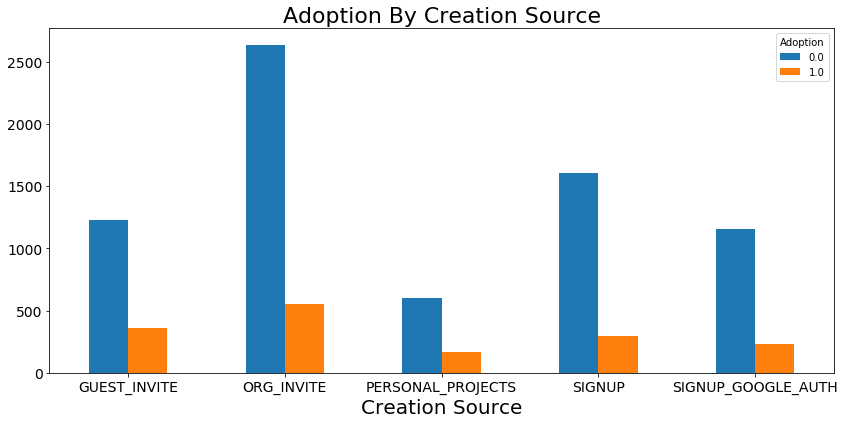

In [19]:
fig, ax = plt.subplots()
merged_users.groupby(['creation_source','adopted']).size().unstack().\
plot(kind='bar',ax=ax,figsize=(12,6),fontsize=14, rot=0)
ax.set_title('Adoption By Creation Source', fontsize=22)
ax.set_xlabel('Creation Source', fontsize=20)
ax.legend(title='Adoption')
plt.tight_layout()
plt.show()

In [20]:
merged_users = merged_users.replace({"adopted":[True, False]},{"adopted":[int(1),int(0)]})

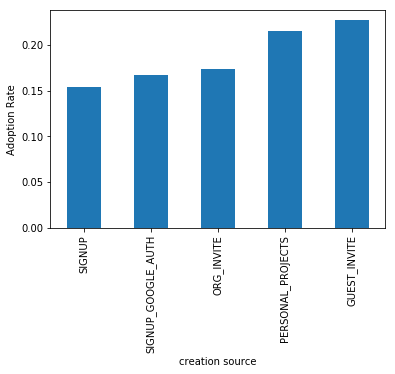

In [21]:
merged_users.groupby('creation_source')['adopted'].mean().sort_values(0).plot(kind='bar')
plt.ylabel('Adoption Rate')
plt.xlabel('creation source')
plt.show()

**Users who used signup (signup via the website) or personal_projects (invited to join another user's personal workspace) appear to have higher adoption rate.**

In [360]:
big_org=list(merged_users['org_id'].value_counts().head(10))
big_org

[319, 233, 201, 168, 159, 138, 128, 124, 119, 104]

In [361]:
merged_users[merged_users.org_id.isin(big_org)].shape

(265, 14)

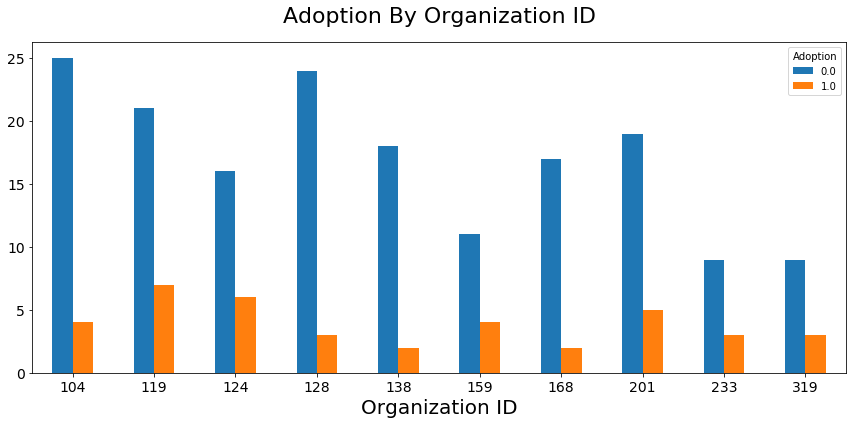

In [362]:
fig, ax = plt.subplots()
merged_users[merged_users.org_id.isin(big_org)].groupby(['org_id','adopted']).size().unstack().\
plot(kind='bar',ax=ax,figsize=(12,6),fontsize=14, rot=0)
ax.set_title('Adoption By Organization ID', fontsize=22)
ax.set_xlabel('Organization ID', fontsize=20)
ax.legend(title='Adoption')
plt.tight_layout()
plt.show()

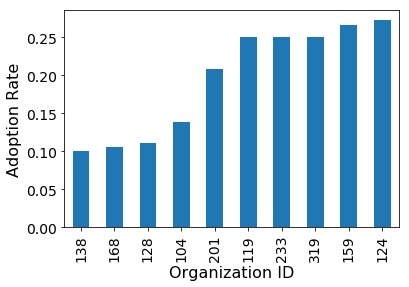

In [363]:
merged_users[merged_users.org_id.isin(big_org)].groupby('org_id')['adopted'].mean().sort_values(0).plot(kind='bar')
plt.ylabel('Adoption Rate', fontsize=16)
plt.xlabel('Organization ID', fontsize=16)
plt.show()

individual invited by organizations 124, 159, 319, 233, 119 have higher adoption rate

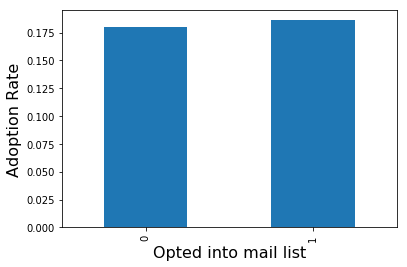

In [22]:
merged_users.groupby('opted_in_to_mailing_list')['adopted'].mean().sort_values(0).plot(kind='bar')
plt.xlabel('Opted into mail list', fontsize=16)
plt.ylabel('Adoption Rate', fontsize=16)
plt.show()

**Users who opted to mailing list appear to have a slightly higher adoption rate**

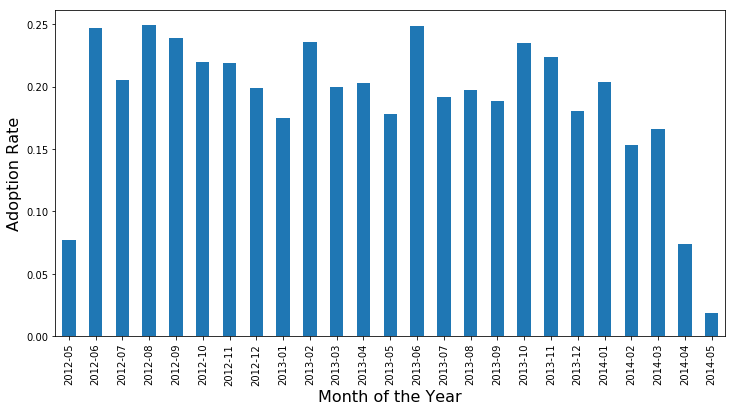

In [23]:
merged_users['date'] = pd.to_datetime(merged_users['creation_time'].dt.date)
merged_users['month'] = merged_users['date'].dt.strftime('%Y-%m')
merged_users.groupby('month')['adopted'].mean().plot(kind='bar', figsize=(12,6))
plt.xlabel('Month of the Year',fontsize=16)
plt.ylabel('Adoption Rate',fontsize=16)
plt.show()

**creation time does not appear to be a strong adoption factor**

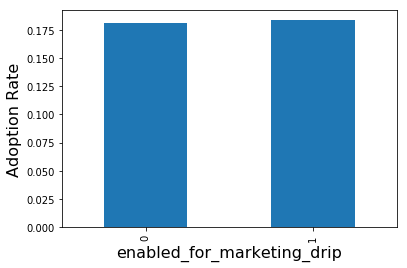

In [24]:
merged_users.groupby('enabled_for_marketing_drip')['adopted'].mean().sort_values(0).plot(kind='bar')
plt.xlabel('enabled_for_marketing_drip', fontsize=16)
plt.ylabel('Adoption Rate', fontsize=16)
plt.show()

Whether enabled for marketing drip or not does not appear to be good indicator of adoption.